In [1]:
import pandas as pd
import numpy as np
import random
import os
import gc

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(42)

In [4]:
train = pd.read_csv('dts/train.csv')
test = pd.read_csv('dts/test.csv')
sample_submission = pd.read_csv('dts/sample_submission.csv', index_col = 0)

In [5]:
train_x = train.drop(['ID', 'Calories_Burned'], axis = 1)
train_y = train['Calories_Burned']
test_x = test.drop('ID', axis = 1)

In [6]:
ordinal_features = ['Weight_Status','Gender']
for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train_x[feature])
    train_x[feature] = le.transform(train_x[feature])
    for label in np.unique(test_x[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test_x[feature] = le.transform(test_x[feature])

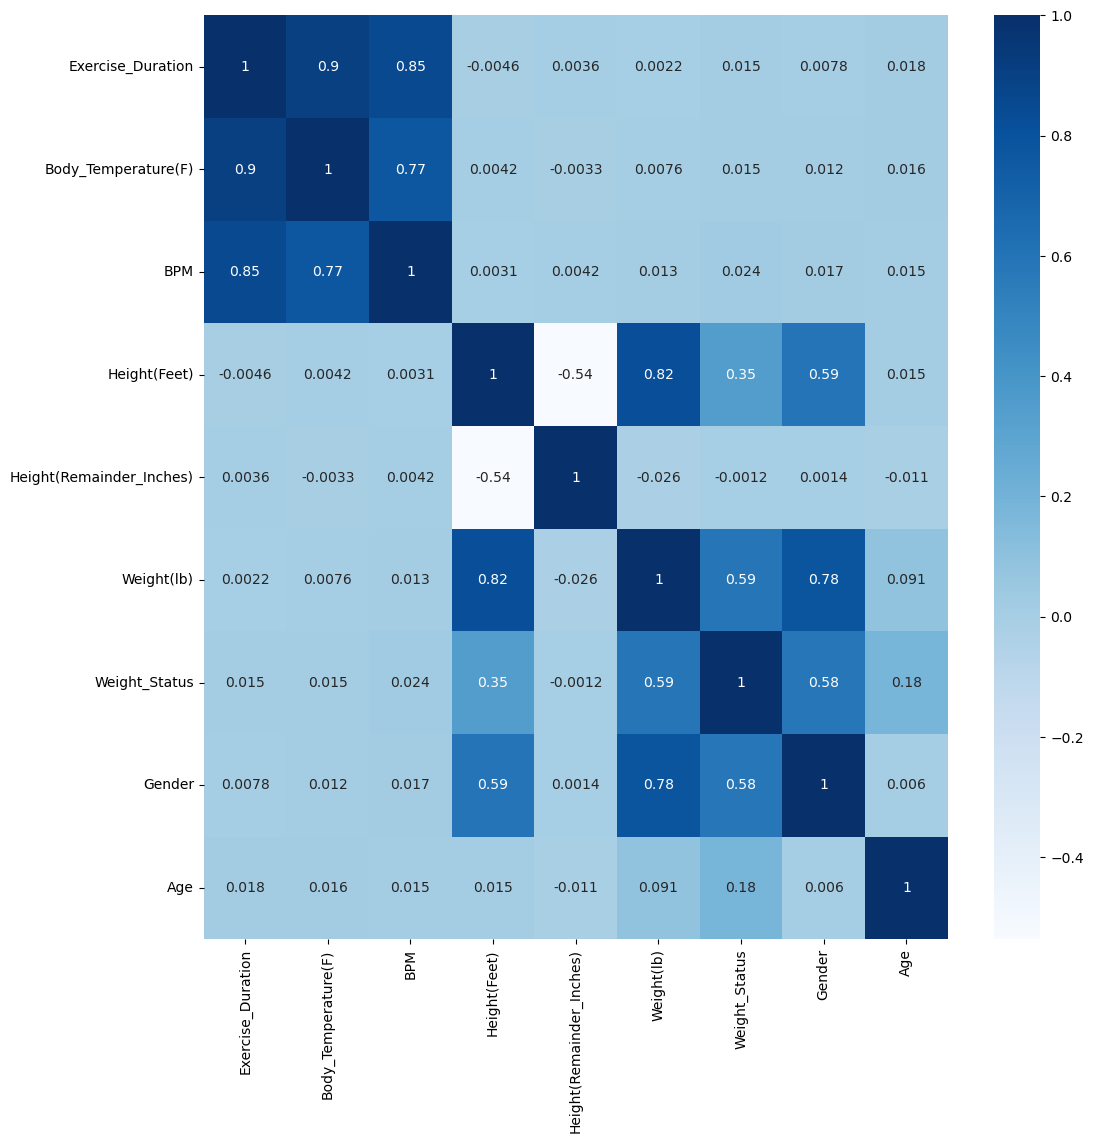

In [7]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (12,12))
sns.heatmap(train_x.corr(), annot = True, cmap = 'Blues')
plt.show()

In [8]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42, shuffle=True)

In [9]:
train_x.head(2)

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
7005,21.0,104.7,89.0,5.0,5.0,154.3,2,0,53
5112,26.0,105.8,106.0,6.0,7.0,222.7,1,1,35


In [10]:
poly = PolynomialFeatures()
train_poly = pd.DataFrame(poly.fit_transform(train_x))
val_poly = pd.DataFrame(poly.fit_transform(val_x))
train_poly.head(2) # 전처리 이후

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,21.0,104.7,89.0,5.0,5.0,154.3,2.0,0.0,53.0,...,23808.49,308.6,0.0,8177.9,4.0,0.0,106.0,0.0,0.0,2809.0
1,1.0,26.0,105.8,106.0,6.0,7.0,222.7,1.0,1.0,35.0,...,49595.29,222.7,222.7,7794.5,1.0,1.0,35.0,1.0,35.0,1225.0


In [11]:
model = DecisionTreeRegressor(random_state=42)
model.fit(train_poly, train_y)

DecisionTreeRegressor(random_state=42)

In [12]:
preds = model.predict(val_poly)
mean_squared_error(val_y, preds, squared=False)

5.543645010279789